In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
# Read Data
gdwine = 'https://drive.google.com/uc?export=download&id='+'https://drive.google.com/file/d/10YIqNrgTSXQi0cmorUq_9up2bAz40DE2/view?usp=sharing'.split('/')[-2]
wine = pd.read_csv(gdwine)

In [4]:
# View Data
wine.info()
wine.describe()
wine.isnull().sum()
wine.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Data Pre Processing
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [6]:
label_quality = LabelEncoder()

In [7]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [8]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/var/mobile/Containers/Data/Application/A7BC3B94-22F0-49C9-95BB-380E0B48EAA9/Documents/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


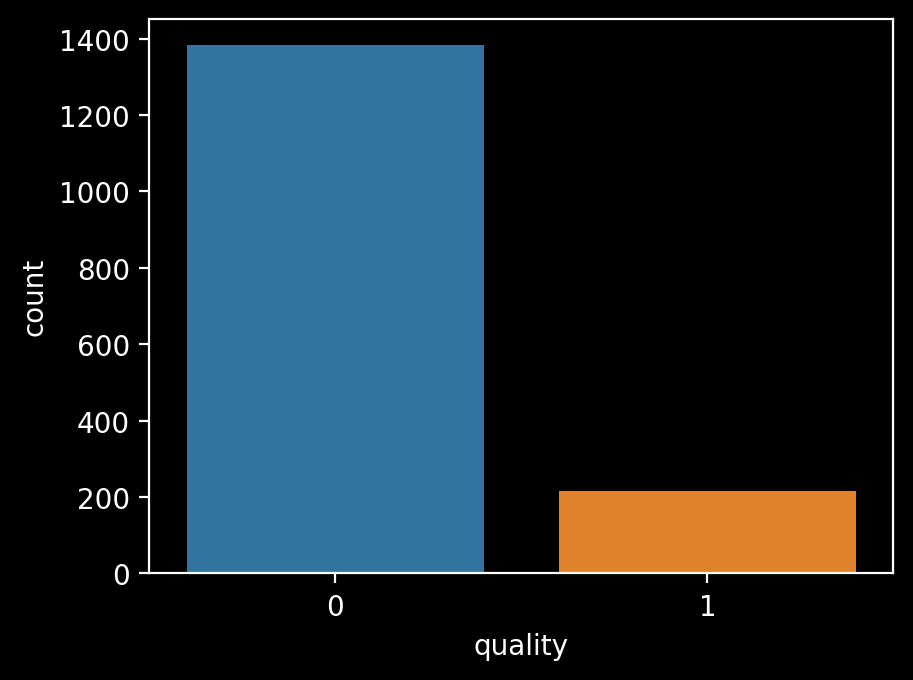

In [9]:
sns.countplot(wine['quality'])

In [10]:
# Separate the dataset as response variable and feature variables
x = wine.drop('quality', axis = 1)
y = wine['quality']

In [11]:
# Train and Test Splitting of Data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [12]:
# Apply standard scaling to get optimized result
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [13]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [14]:
print(pred_rfc[:20],y_test[:20])

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0] 803     0
124     0
350     0
682     0
1326    0
976     0
1493    0
706     0
613     0
1587    0
513     1
1505    0
1525    0
1568    0
220     0
1010    1
30      0
942     1
481     1
135     0
Name: quality, dtype: int64


In [15]:
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.62      0.38      0.47        47

    accuracy                           0.88       320
   macro avg       0.76      0.67      0.70       320
weighted avg       0.86      0.88      0.86       320

[[262  11]
 [ 29  18]]


In [16]:
# SVM Classifier
clf = svm.SVC()
clf.fit(x_train, y_train)
pred_clf = clf.predict(x_test)

In [17]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


In [18]:
# Neural Network
mlpc= MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
mlpc.fit(x_train,y_train)
pred_mlpc = mlpc.predict(x_test)

/var/mobile/Containers/Data/Application/A7BC3B94-22F0-49C9-95BB-380E0B48EAA9/Library/Application Support/com.rationalmatter.junoapp/python-home/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [19]:
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       273
           1       0.59      0.40      0.48        47

    accuracy                           0.87       320
   macro avg       0.75      0.68      0.70       320
weighted avg       0.86      0.87      0.86       320

[[260  13]
 [ 28  19]]


In [20]:
# Prdict
xnew = [[2,3,4,5,6,5,6,7,7]]
xnew = sc.transform(xnew)

ValueError: X has 9 features, but this StandardScaler is expecting 11 features as input.

In [21]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


 Shell commands are disabled in Juno.
